In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
import warnings
warnings.filterwarnings("ignore")

<Axes: >

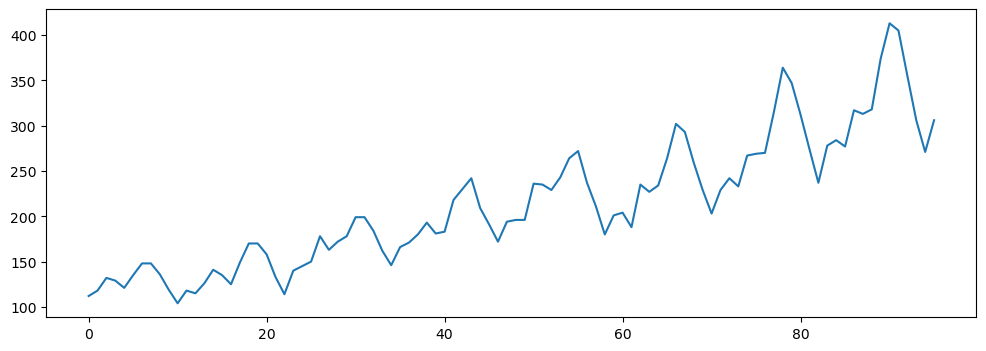

In [3]:
plt.figure(figsize=(12,4))
data=pd.read_csv('Airlines_Data.csv')
data.Passengers.plot()

In [4]:
data

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


In [5]:
Train = data.head(87)
Test = data.tail(9)

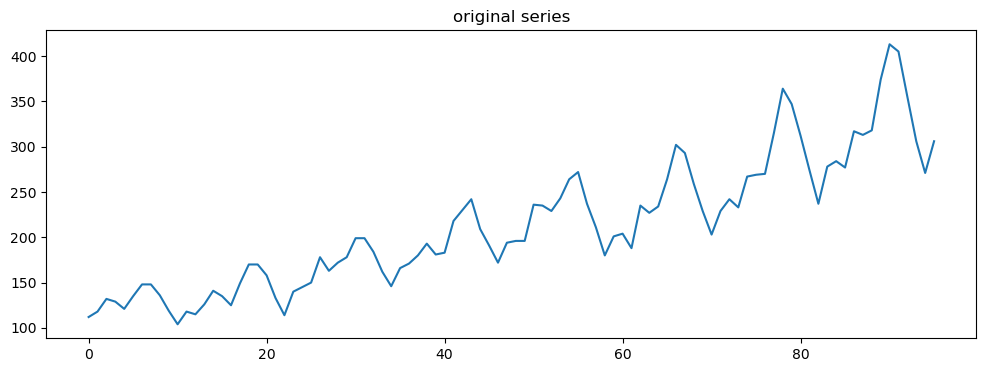

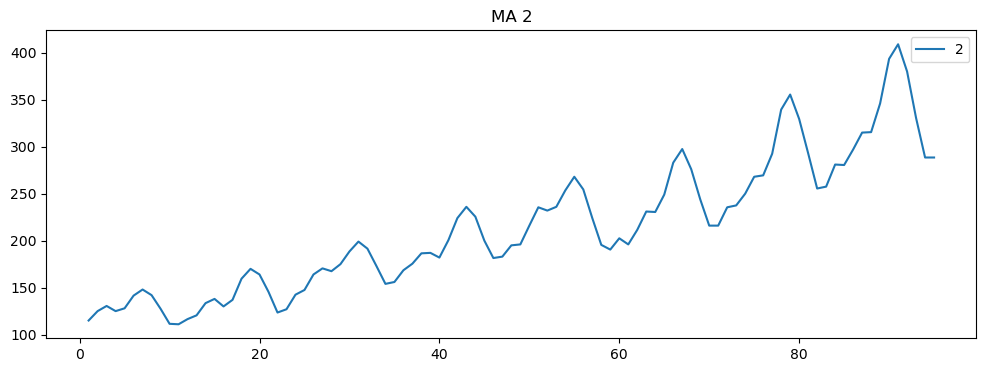

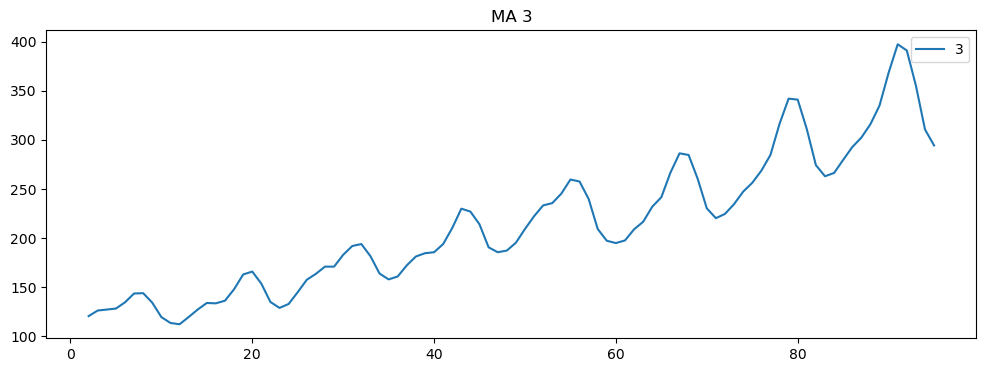

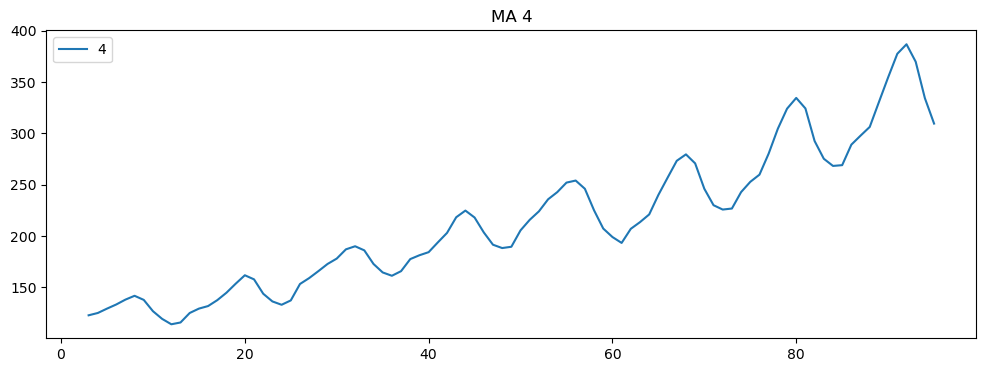

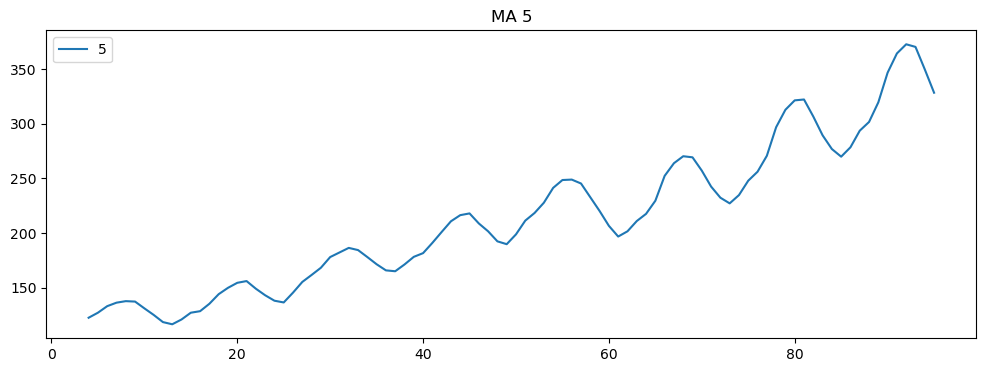

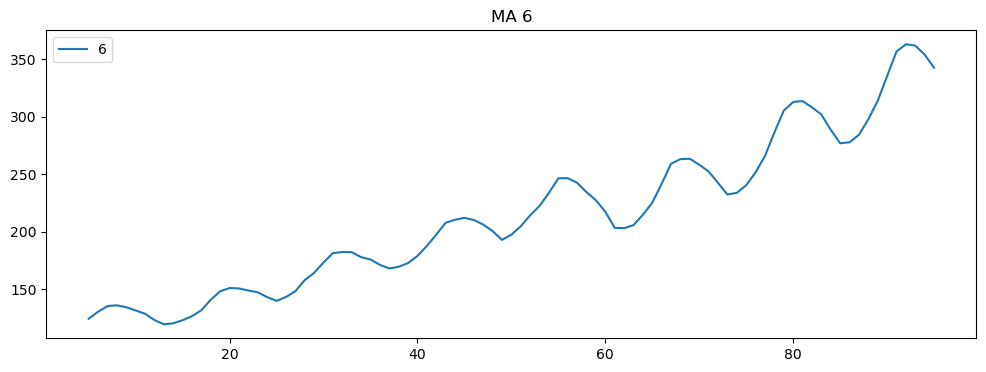

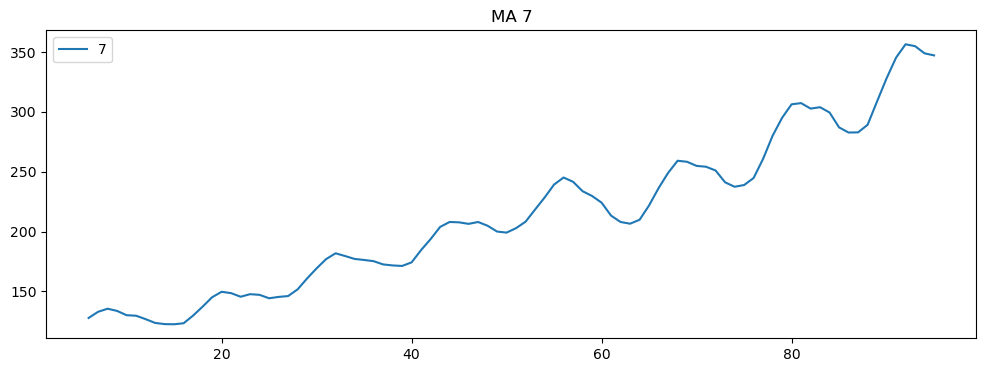

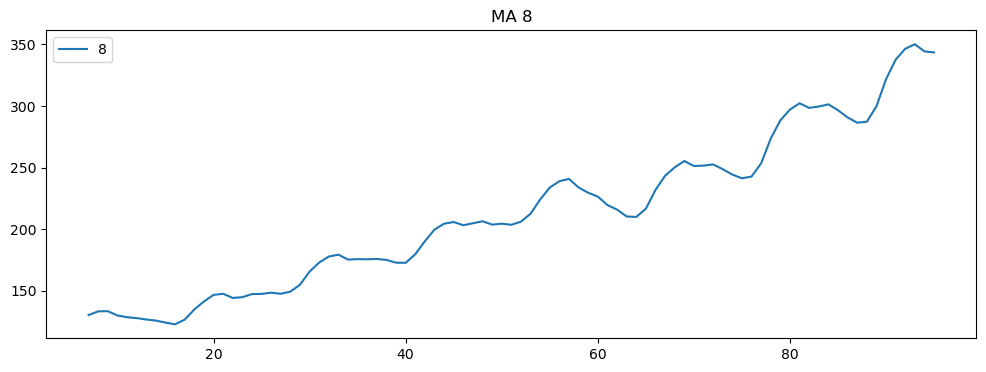

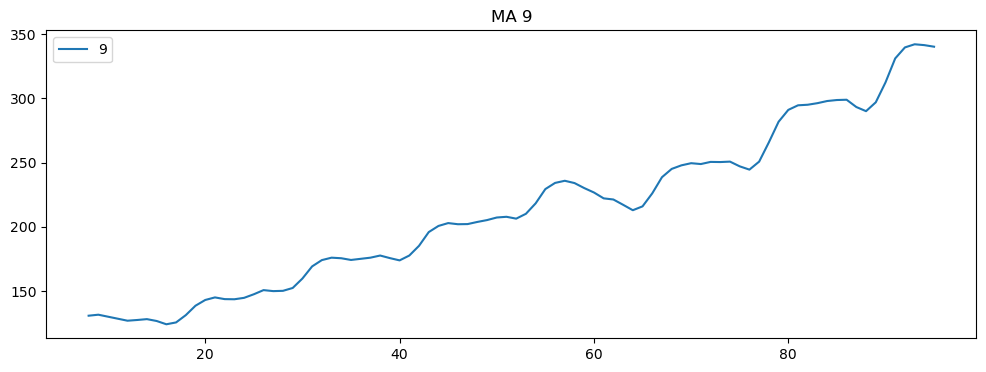

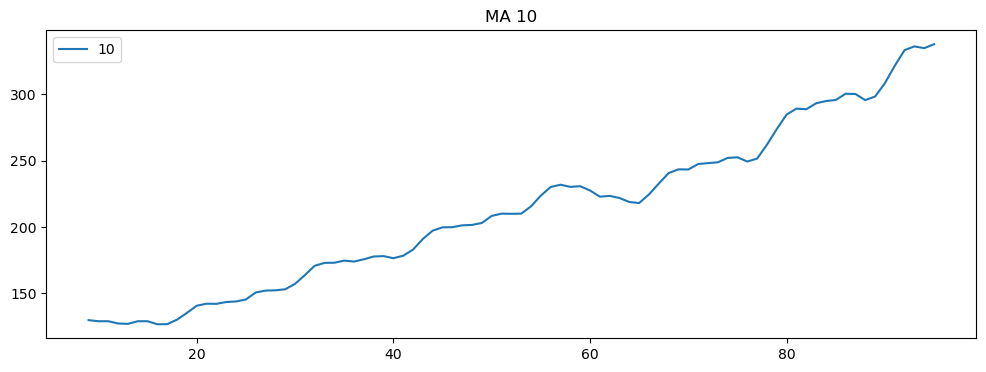

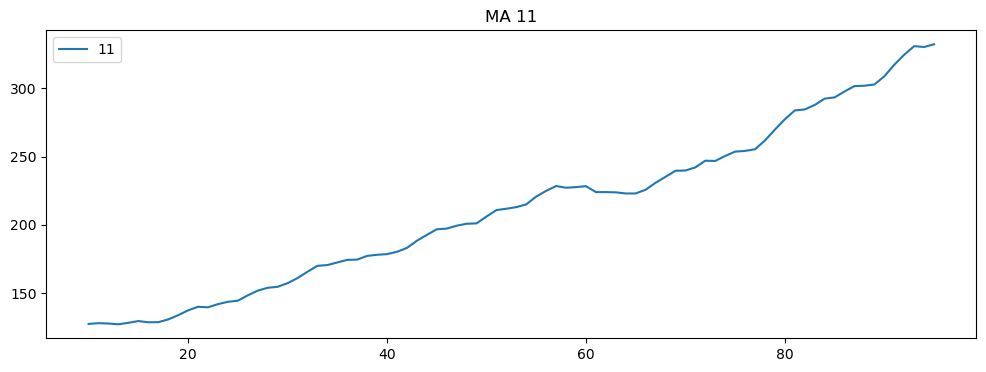

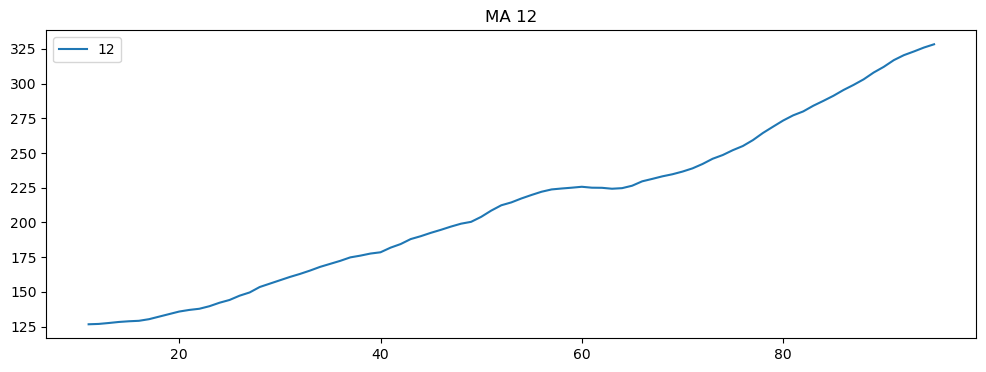

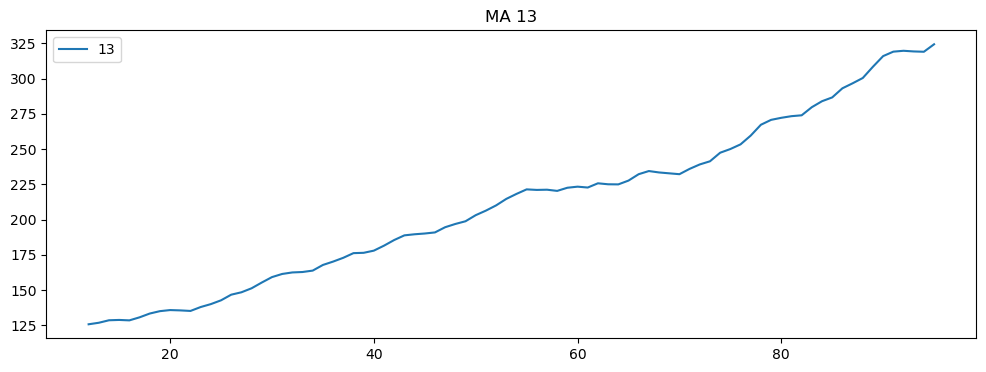

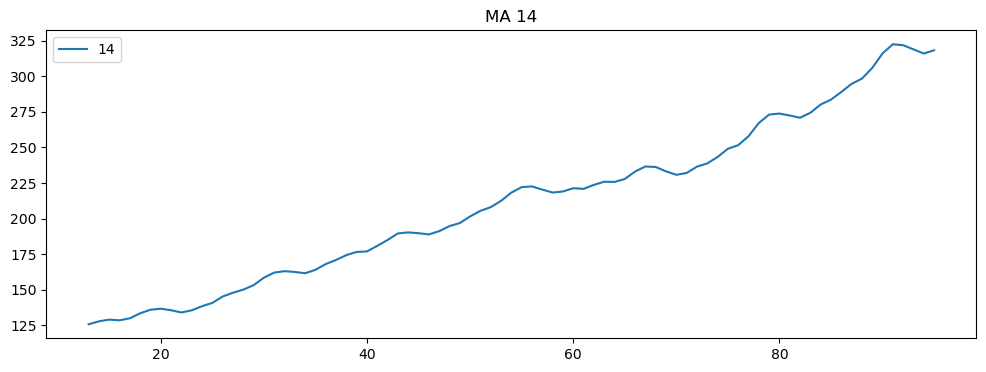

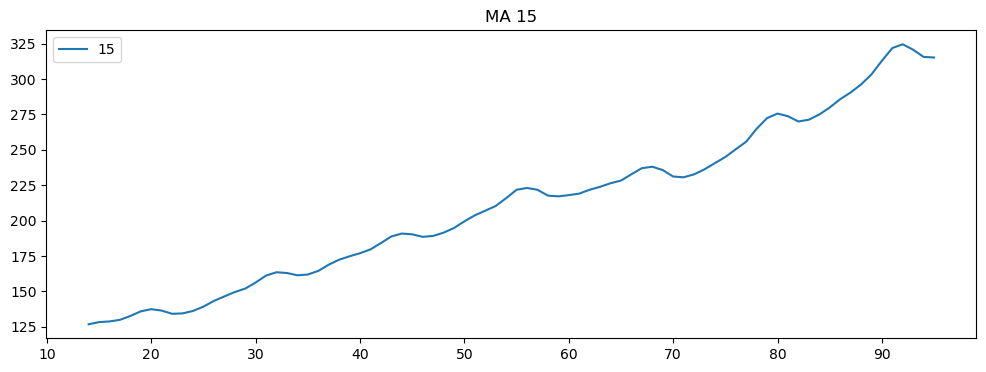

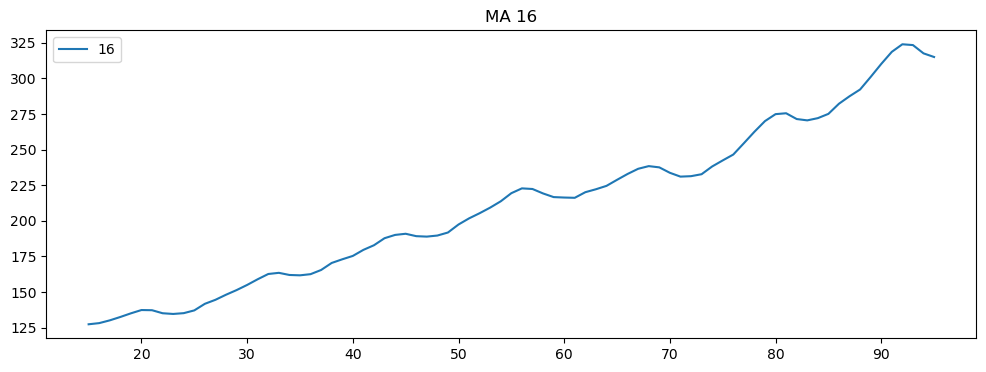

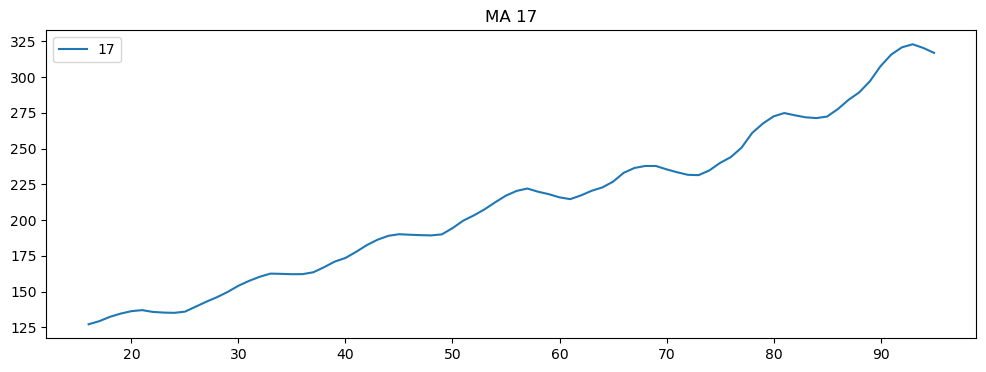

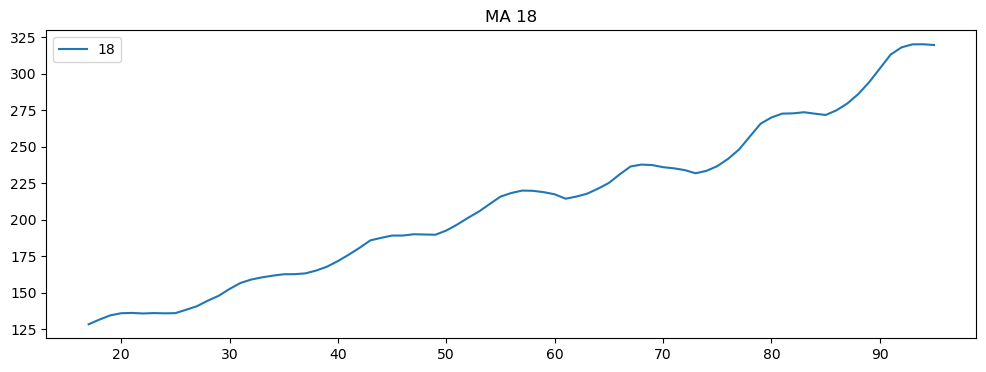

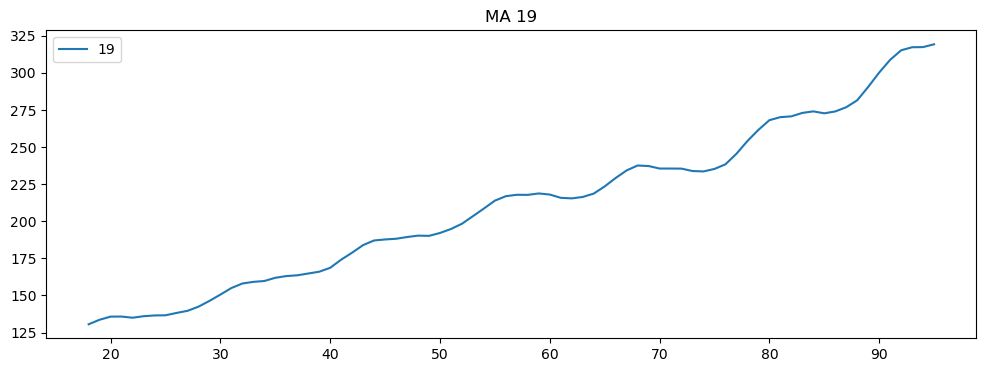

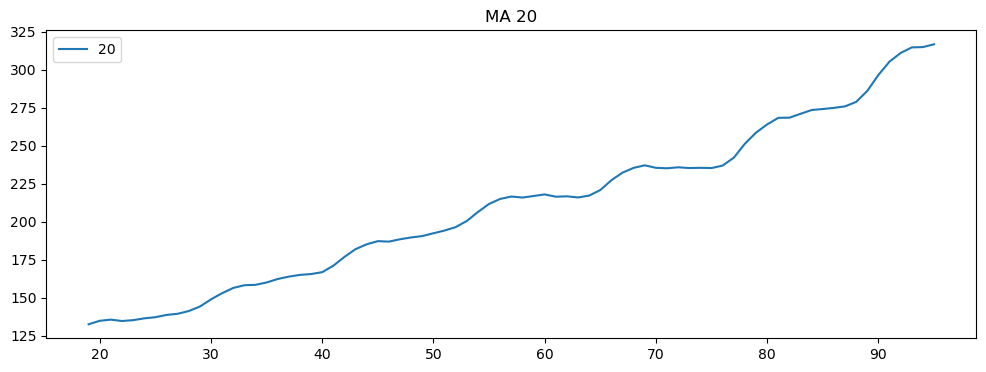

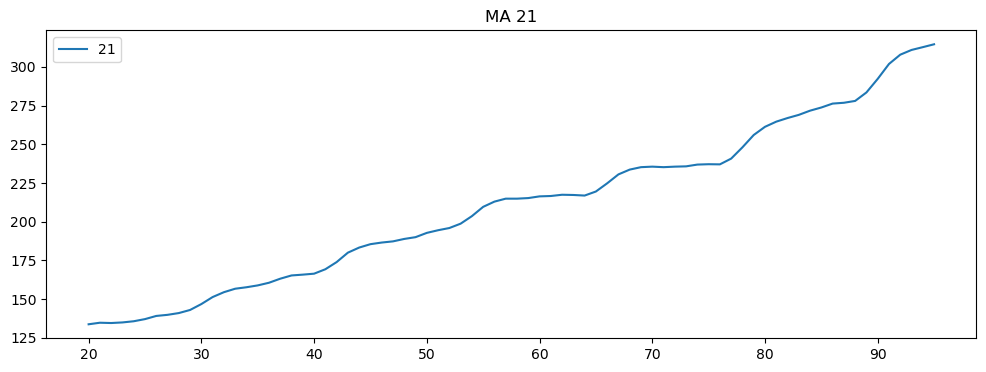

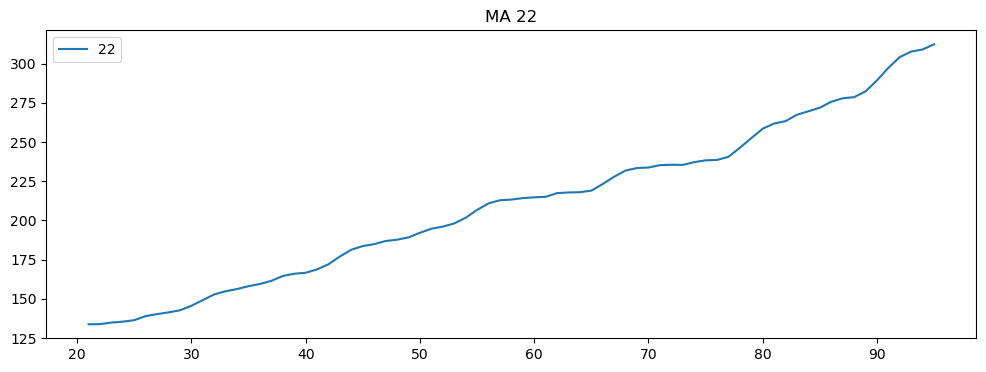

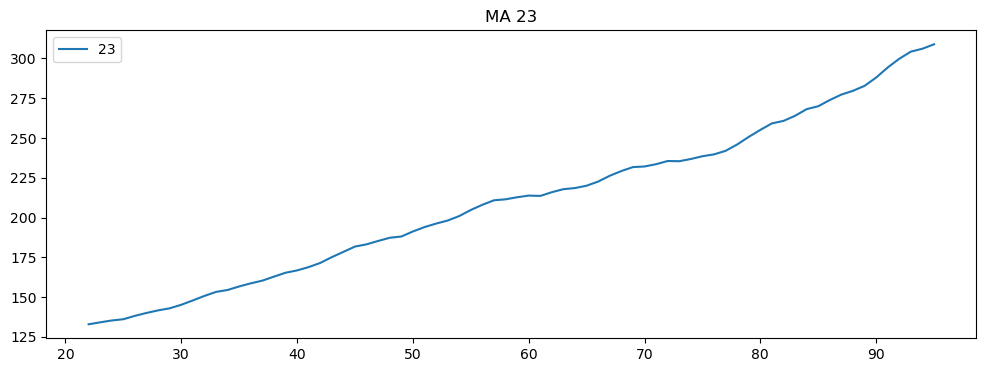

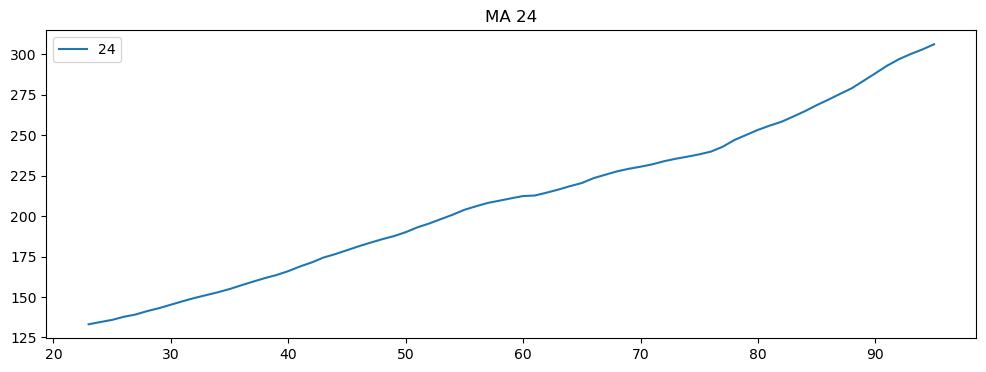

In [6]:
plt.figure(figsize=(12,4))
data.Passengers.plot(label="org")
plt.title("original series")

for i in range(2,25):
    plt.figure(figsize=(12,4))


    data["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.title("MA "+str(i))
    plt.legend(loc='best')
    plt.show()

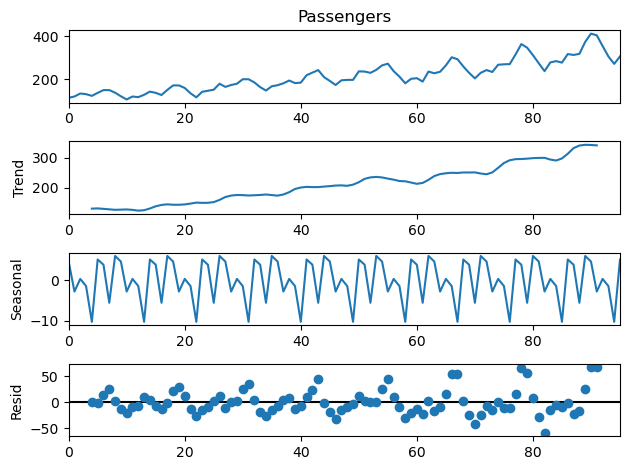

In [7]:
decompose_ts_add = seasonal_decompose(data.Passengers,period=9)
decompose_ts_add.plot()
plt.show()

# Evaluation Metric MAPE

In [8]:
def MAPE(org,pred):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [9]:
Train['Passengers']

0     112
1     118
2     132
3     129
4     121
     ... 
82    237
83    278
84    284
85    277
86    317
Name: Passengers, Length: 87, dtype: int64

# Simple Exponential Method

In [10]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.9)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(Test.Passengers,pred_ses)

10.7461426004912

In [11]:
pred_ses

87    313.060312
88    313.060312
89    313.060312
90    313.060312
91    313.060312
92    313.060312
93    313.060312
94    313.060312
95    313.060312
dtype: float64

In [12]:
x=np.linspace(0.1,1,20)
for i in x :
    ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=i)
    pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
    score=MAPE(Test.Passengers,pred_ses)
    print("smoothing_level ",i,"-->","MAPE Error",score)

smoothing_level  0.1 --> MAPE Error 17.448328257815145
smoothing_level  0.1473684210526316 --> MAPE Error 15.80736386226893
smoothing_level  0.19473684210526315 --> MAPE Error 15.07742985580502
smoothing_level  0.24210526315789474 --> MAPE Error 14.706030793950154
smoothing_level  0.2894736842105263 --> MAPE Error 14.457940163395213
smoothing_level  0.33684210526315794 --> MAPE Error 14.223694477963441
smoothing_level  0.38421052631578945 --> MAPE Error 13.957044336927716
smoothing_level  0.43157894736842106 --> MAPE Error 13.645226461152657
smoothing_level  0.4789473684210527 --> MAPE Error 13.292206431711564
smoothing_level  0.5263157894736842 --> MAPE Error 12.908763370539901
smoothing_level  0.5736842105263158 --> MAPE Error 12.506812083878033
smoothing_level  0.6210526315789474 --> MAPE Error 12.096479518655148
smoothing_level  0.6684210526315789 --> MAPE Error 11.684929256319379
smoothing_level  0.7157894736842105 --> MAPE Error 11.27622613583164
smoothing_level  0.76315789473684

# double expo

In [13]:
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

12.74451051128764

In [14]:
pred_hw

87    314.252007
88    319.621299
89    324.990592
90    330.359884
91    335.729176
92    341.098469
93    346.467761
94    351.837054
95    357.206346
dtype: float64

In [15]:
import numpy as np
alphas=np.arange(0.1,1,0.9/10)
betas=np.arange(0.1,1,0.9/10)
l=[]
for i in alphas :
    for j in betas:
        hw_model = Holt(Train["Passengers"]).fit(smoothing_level=i, smoothing_slope=j)
        print(hw_model)
        pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])

        score=MAPE(pred_hw,Test.Passengers)
        print("smoothing_level ",i," smoothing_slope",j,"-->","MAPE Error",score)
        l.append((i,j,score))

smoothing_level  0.1  smoothing_slope 0.1 --> MAPE Error 14.252679448846063
smoothing_level  0.1  smoothing_slope 0.19 --> MAPE Error 13.275628580662293
smoothing_level  0.1  smoothing_slope 0.28 --> MAPE Error 12.58233750838778
smoothing_level  0.1  smoothing_slope 0.37 --> MAPE Error 12.472460458677126
smoothing_level  0.1  smoothing_slope 0.45999999999999996 --> MAPE Error 12.361250874359314
smoothing_level  0.1  smoothing_slope 0.5499999999999999 --> MAPE Error 13.360608619578604
smoothing_level  0.1  smoothing_slope 0.64 --> MAPE Error 16.949112974348278
smoothing_level  0.1  smoothing_slope 0.73 --> MAPE Error 20.697534796192386
smoothing_level  0.1  smoothing_slope 0.82 --> MAPE Error 24.250327103687187
smoothing_level  0.1  smoothing_slope 0.9099999999999999 --> MAPE Error 27.06134818184317
smoothing_level  0.19  smoothing_slope 0.1 --> MAPE Error 14.155309971956855
smoothing_level  0.19  smoothing_slope 0.19 --> MAPE Error 13.939914975051067
smoothing_level  0.19  smoothing_sl

smoothing_level  0.5499999999999999  smoothing_slope 0.1 --> MAPE Error 14.379908108198988
smoothing_level  0.5499999999999999  smoothing_slope 0.19 --> MAPE Error 14.725805468505886
smoothing_level  0.5499999999999999  smoothing_slope 0.28 --> MAPE Error 14.868817052481505
smoothing_level  0.5499999999999999  smoothing_slope 0.37 --> MAPE Error 14.528244691023385
smoothing_level  0.5499999999999999  smoothing_slope 0.45999999999999996 --> MAPE Error 13.949584545962823
smoothing_level  0.5499999999999999  smoothing_slope 0.5499999999999999 --> MAPE Error 15.050104276818757
smoothing_level  0.5499999999999999  smoothing_slope 0.64 --> MAPE Error 16.284164537082862
smoothing_level  0.5499999999999999  smoothing_slope 0.73 --> MAPE Error 18.25177545268285
smoothing_level  0.5499999999999999  smoothing_slope 0.82 --> MAPE Error 20.30217982796587
smoothing_level  0.5499999999999999  smoothing_slope 0.9099999999999999 --> MAPE Error 21.965175248082126
smoothing_level  0.64  smoothing_slope 0

In [16]:
a=pd.DataFrame(l,columns=["smoothing_level","smoothing_slope","score"])
a.sort_values(["score"])

,smoothing_level,smoothing_slope,score
4,0.10,0.46,12.361251
3,0.10,0.37,12.472460
2,0.10,0.28,12.582338
90,0.91,0.10,12.643150
80,0.82,0.10,12.681936
...,...,...,...
26,0.28,0.64,39.426195
16,0.19,0.64,41.815908
17,0.19,0.73,54.366469
18,0.19,0.82,70.571787


In [17]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

6.33817915025136

# Final Model by combining train and test

In [18]:
hwe_model_add_add = ExponentialSmoothing(data["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [19]:
np.round(hwe_model_add_add.forecast(10),0)

96     319.0
97     312.0
98     350.0
99     347.0
100    352.0
101    404.0
102    441.0
103    427.0
104    377.0
105    330.0
dtype: float64